In [ ]:
# !pip install ultralytics roboflow opencv-python-headless matplotlib tensorflow numpy pyyaml
from ultralytics import YOLO
import os
from roboflow import Roboflow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil
from collections import Counter
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import time

c:\Users\HP\anaconda3\envs\yolo_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
PATH = "Seatbelt Helmet Detection.v6i.yolov8_no_augmented"
CLASS_NAME = ['0', 'car', 'helmet', 'license plate', 'motorcycle', 
                'no helmet', 'no seat belt', 'person', 'seatbelt']
DATASET_PATH = {
        "train": f"{PATH}/train",
        "val": f"{PATH}/valid",
        "test": f"{PATH}/test"
    }

In [8]:
#Fonction personnel pour afficher les images avec ces plot
def plot_image(name, path):
    #Labeling view
    label_path = path+"/labels/"
    image_path = path+"/images/"

    # Lire le fichier de label
    with open(label_path+name+".txt", 'r') as label_file:
        labels = label_file.readlines()

    image = cv2.imread(image_path+name+".jpg")
    image = np.asarray(image)

    # Récupérer les dimensions de l'image
    h, w, _ = image.shape

    # Parcourir les labels et dessiner les bounding boxes
    for line in labels:
        values = line.strip().split()
        
        class_id = int(values[0])  # ID de la classe
        x_center, y_center, box_width, box_height = map(float, values[1:])

        # Convertir YOLO format (x_center, y_center, width, height) en pixels
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        class_name = CLASS_NAME[class_id]

        # Dessiner le rectangle sur l'image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Vert
        cv2.putText(image, f"Class {class_name}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off') 
    plt.show()

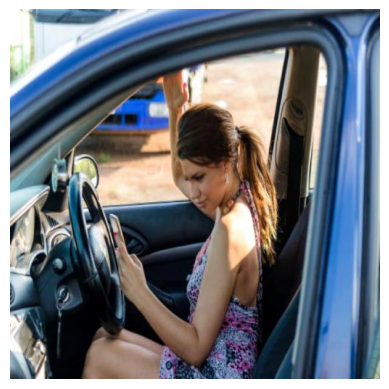

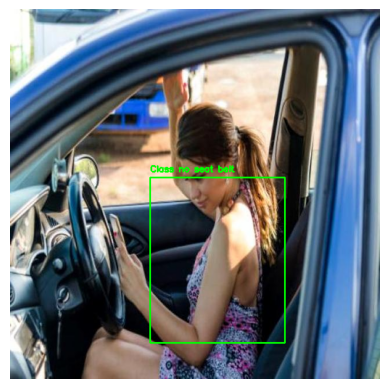

In [9]:
image = cv2.imread(f"{PATH}/train/images/-515_jpg.rf.38c81f5d9ba118cc468cfdf1051036a4.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Désactive les axes
plt.show()

plot_image(name="-515_jpg.rf.38c81f5d9ba118cc468cfdf1051036a4", path=f"{PATH}/train")

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
# Création du fichier YAML
import yaml

data_config = {
    "train": f"{PATH}/train",
    "val": f"{PATH}/valid",
    "test": f"{PATH}/test",
    "nc": 9,
    "names": ['0', 'car', 'helmet', 'license plate', 'motorcycle', 'no helmet', 'no seat belt', 'person', 'seatbelt']
}

# Sauvegarde dans un fichier YAML
yaml_file = "Seatbelt_Helmet.yaml"
with open(yaml_file, "w", encoding="utf-8") as file:
    yaml.dump(data_config, file, default_flow_style=False, allow_unicode=True)

print(f"Fichier YAML créé : {yaml_file}")


Fichier YAML créé : Seatbelt_Helmet.yaml


In [ ]:
start_time = time.time()
results = model.train(
    data="Seatbelt_Helmet.yaml",  # Le fichier YAML
    epochs=50,  # Nombre d'époques, 50 est une bonne valeur de départ
    imgsz=640,  # Taille de l'image, idéale pour la plupart des modèles, tu peux augmenter à 1024 si tu as plus de mémoire GPU
    patience=5,  # Arrêt précoce basé sur la patience
    plots=True,  # Affichage des graphiques (utile pour le suivi de l'entraînement)
    augment=True, #True,  # Activation de la data augmentation pour améliorer la généralisation
    #device='cuda'  # Utilisation du GPU
)

total_time = time.time() - start_time
print(f"Temps d'entraînement total: {total_time // 60:.0f} minutes et {total_time % 60:.0f} secondes")

#Temps d'entraînement total: 7 minutes et 40 secondes
#Temps d'entraînement avec data augmentationtotal: 16 minutes et 2 secondes

New https://pypi.org/project/ultralytics/8.3.75 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1 CPU (Intel Core(TM) i5-8350U 1.70GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=Seatbelt_Helmet.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

train: Scanning C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\train\labels... 689 images, 173 backgrounds, 48 corrupt: 100%|██████████| 737/737 [00:07<00:00, 97.07it/s] 

train: WARNING  C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\train\images\data_original_Untitled-design-1-png_08bae47a-ae99-4d38-a9e9-f50545036dc6_png.rf.3ab0ec7519333e0a7586eb1a58f73f02.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Desktop\\Master 2 IABD\\Semestre 1\\Deep Learning\\Seatbelt Helmet Detection\\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\\train\\images\\data_original_Untitled-design-1-png_08bae47a-ae99-4d38-a9e9-f50545036dc6_png.rf.3ab0ec7519333e0a7586eb1a58f73f02.jpg'
train: WARNING  C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\train\images\data_original_Untitled-design-1-png_0932f5cf-9d23-4ae1-8405-256ba05fabfe_png.rf.29398b9c8d03ed7a188a3acf96cd7947.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Desktop\

train: New cache created: C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 75, len(boxes) = 894. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\valid\labels... 226 images, 43 backgrounds, 1 corrupt: 100%|██████████| 227/227 [00:01<00:00, 135.40it/s]

val: WARNING  C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\valid\images\girl-fastened-seat-belt-sits-car-back-young-cheerful-near-window-178425759_jpg.rf.6fb429497bab6997826d5f3ffe488aa0.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Desktop\\Master 2 IABD\\Semestre 1\\Deep Learning\\Seatbelt Helmet Detection\\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\\valid\\images\\girl-fastened-seat-belt-sits-car-back-young-cheerful-near-window-178425759_jpg.rf.6fb429497bab6997826d5f3ffe488aa0.jpg'


val: New cache created: C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\Seatbelt Helmet Detection\Seatbelt Helmet Detection.v6i.yolov8_no_augmented\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 28, len(boxes) = 277. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_los

       1/50         0G      1.787      4.268      2.003         50        640:   2%|▏         | 1/44 [00:16<12:03, 16.83s/it]


KeyboardInterrupt: 

In [ ]:
!zip -r yolo_trained_false.zip /kaggle/working/

In [ ]:
metrics = model.val(
    data="/kaggle/working/ceinture.yaml",  # Le fichier YAML
    batch=16,  # Taille du batch
    conf=0.5,  # Seuil de confiance
    iou=0.6) 

metrics

In [ ]:
print(f"Précision : {metrics.box.map:.4f}")
# print(f"Précision moyenne pondérée (mAP50-95) : {metrics.box.map50_95:.4f}")

# Accéder à la précision, le rappel et le score F1 par classe
print(f"Précision (Precision par classe Texte) : {sum(metrics.box.p) / len(metrics.box.p):.4f}")
print(f"Rappel (Recall par classe Texte) : {sum(metrics.box.r) / len(metrics.box.r):.4f}")
print(f"Score F1 : {sum(metrics.box.f1) / len(metrics.box.f1):.4f}")